In [1]:
from pprint import pprint

import matplotlib.pyplot as plt
from datasets import load_dataset

In [2]:
volcano_data = load_dataset("easytpp/volcano")
taobao_data = load_dataset("easytpp/taobao")
retweet_data = load_dataset("easytpp/retweet")
stackoverflow_data = load_dataset("easytpp/stackoverflow")
taxi_data = load_dataset("easytpp/taxi")
amazon_data = load_dataset("easytpp/amazon")
earthquake_data = load_dataset("easytpp/earthquake")

Generating train split:   0%|          | 0/400 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/50 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/181 [00:00<?, ? examples/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

Generating train split:   0%|          | 0/20000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Generating train split:   0%|          | 0/1401 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/401 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/401 [00:00<?, ? examples/s]

Generating train split:   0%|          | 0/1400 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/200 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/400 [00:00<?, ? examples/s]

Generating train split:   0%|          | 0/6454 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/922 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1851 [00:00<?, ? examples/s]

Generating train split:   0%|          | 0/3000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/400 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/900 [00:00<?, ? examples/s]

In [3]:
volcano_data["train"][0]

{'dim_process': 1,
 'seq_idx': 0,
 'seq_len': 5,
 'time_since_last_event': [0.0,
  1.2096000000019551,
  49.85280000000057,
  20.822399999997288,
  1439.7695999999996],
 'time_since_start': [0.0,
  1.2096000000019551,
  51.062400000002526,
  71.88479999999981,
  1511.6543999999994],
 'type_event': [0, 0, 0, 0, 0]}

In [4]:
def normalize_times_to_1(dataset):
    normalized_dataset = {}

    # Process each split separately
    for split in dataset.keys():
        # Find max time for this specific split
        all_times = []
        for example in dataset[split]:
            all_times.extend(example['time_since_start'])

        max_time = max(all_times)

        # Define normalization function for this split
        def normalize_example(example):
            return {
                'seq_len': example['seq_len'],
                'type_event': example['type_event'],
                'seq_idx': example['seq_idx'],
                'time_since_start': [time / max_time for time in example['time_since_start']],
                'time_since_last_event': [time / max_time for time in example['time_since_last_event']],
                'dim_process': example['dim_process']
            }

        # Apply normalization while preserving Dataset type
        normalized_dataset[split] = dataset[split].map(normalize_example)

    return normalized_dataset

volcano_data = normalize_times_to_1(volcano_data)
taobao_data = normalize_times_to_1(taobao_data)
retweet_data = normalize_times_to_1(retweet_data)
stackoverflow_data = normalize_times_to_1(stackoverflow_data)
taxi_data = normalize_times_to_1(taxi_data)
amazon_data = normalize_times_to_1(amazon_data)
earthquake_data = normalize_times_to_1(earthquake_data)

Map:   0%|          | 0/400 [00:00<?, ? examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:   0%|          | 0/181 [00:00<?, ? examples/s]

Map:   0%|          | 0/1300 [00:00<?, ? examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:   0%|          | 0/500 [00:00<?, ? examples/s]

Map:   0%|          | 0/20000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1401 [00:00<?, ? examples/s]

Map:   0%|          | 0/401 [00:00<?, ? examples/s]

Map:   0%|          | 0/401 [00:00<?, ? examples/s]

Map:   0%|          | 0/1400 [00:00<?, ? examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:   0%|          | 0/400 [00:00<?, ? examples/s]

Map:   0%|          | 0/6454 [00:00<?, ? examples/s]

Map:   0%|          | 0/922 [00:00<?, ? examples/s]

Map:   0%|          | 0/1851 [00:00<?, ? examples/s]

Map:   0%|          | 0/3000 [00:00<?, ? examples/s]

Map:   0%|          | 0/400 [00:00<?, ? examples/s]

Map:   0%|          | 0/900 [00:00<?, ? examples/s]

In [5]:
def print_stats(dataset, split='test'):
   dataset = dataset[split]
   stats = {"num_sequences": len(dataset), "max_sequence_length": 0, "min_sequence_length": 1000000, "max_event_time": 0, "min_event_time": 1000000}
   seq_lengths = [len(seq['time_since_last_event']) for seq in dataset]
   times_since_last_event = [time for seq in dataset for time in seq['time_since_last_event']]
   min_delta_event_time = min(times_since_last_event)
   max_delta_event_time = max(times_since_last_event)
   min_seq_length = min(seq_lengths)
   max_seq_length = max(seq_lengths)
   avg_seq_length = sum(seq_lengths) / len(seq_lengths)
   avg_delta_event_time = sum(times_since_last_event) / len(times_since_last_event)
   stats["max_sequence_length"] = max_seq_length
   stats["min_sequence_length"] = min_seq_length
   stats["num_sequences"] = len(seq_lengths)
   stats["avg_sequence_length"] = avg_seq_length
   stats["max_event_time"] = max_delta_event_time
   stats["min_event_time"] = min_delta_event_time
   stats["avg_event_time"] = avg_delta_event_time
   encoutered_marks = set()
   for seq in dataset:
       for mark in seq['type_event']:
           if mark not in encoutered_marks:
               encoutered_marks.add(mark)
   stats["num_marks"] = len(encoutered_marks)
   pprint(stats)

# Dataset Stats Prints

## TaoBao

In [6]:
print_stats(taobao_data)

{'avg_event_time': 0.0039794627536291205,
 'avg_sequence_length': 56.91,
 'max_event_time': 0.08722266420221501,
 'max_sequence_length': 64,
 'min_event_time': 0.0,
 'min_sequence_length': 32,
 'num_marks': 17,
 'num_sequences': 500}


## Retweet

In [7]:
print_stats(retweet_data)

{'avg_event_time': 0.004215946653557314,
 'avg_sequence_length': 109.2325,
 'max_event_time': 0.860236285580097,
 'max_sequence_length': 264,
 'min_event_time': 0.0,
 'min_sequence_length': 50,
 'num_marks': 3,
 'num_sequences': 2000}


## Stackoverflow

In [8]:
print_stats(stackoverflow_data)

{'avg_event_time': 0.013510163001317162,
 'avg_sequence_length': 66.12967581047381,
 'max_event_time': 0.2717740280160645,
 'max_sequence_length': 101,
 'min_event_time': 0.0,
 'min_sequence_length': 41,
 'num_marks': 21,
 'num_sequences': 401}


## Taxi

In [9]:
print_stats(taxi_data)

{'avg_event_time': 0.012640938078432947,
 'avg_sequence_length': 37.05,
 'max_event_time': 0.30762841601250773,
 'max_sequence_length': 38,
 'min_event_time': 0.0,
 'min_sequence_length': 36,
 'num_marks': 10,
 'num_sequences': 400}


## Amazon

In [10]:
print_stats(amazon_data)

{'avg_event_time': 0.007695015193331811,
 'avg_sequence_length': 45.40680713128039,
 'max_event_time': 0.012134090437262303,
 'max_sequence_length': 94,
 'min_event_time': 0.0,
 'min_sequence_length': 14,
 'num_marks': 16,
 'num_sequences': 1851}


# Plots

In [11]:
def plot_stats(dataset, splits=['train']):
   # Extract the data for each split
   split_data = {split: dataset[split] for split in splits}

    # Create subplots
    fig, axes = plt.subplots(len(splits) + 1, 2, figsize=(20, 7 * len(splits)))

    for i, split in enumerate(splits):
        data = split_data[split]
        seq_len = data["seq_len"]
        time_since_last_event = data["time_since_last_event"]

        # Histogram of the seq_len
        axes[i, 0].hist(seq_len, bins=20, edgecolor="k")
        axes[i, 0].set_title(f"Histogram of Sequence Length ({split})")
        axes[i, 0].set_xlabel("Sequence Length")
        axes[i, 0].set_ylabel("Frequency")

        # Histogram of the time_since_last_event
        axes[i, 1].hist(time_since_last_event, bins=20, edgecolor="k")
        axes[i, 1].set_title(f"Histogram of Time Since Last Event ({split})")
        axes[i, 1].set_xlabel("Time Since Last Event")
        axes[i, 1].set_ylabel("Frequency")
        # axes[i, 0].set_xscale('log')

        # axes[i, 0].set_yscale('log')
        # axes[i, 1].set_xscale('log')
        axes[i, 1].set_yscale("log")

    plt.tight_layout()
    plt.show()

In [12]:
def plot_stats_per_event_type(dataset, splits=['train']):
   # Extract the data for each split
   split_data = {split: dataset[split] for split in splits}

    # Create subplots
    num_events = dataset["train"][0]["dim_process"]
    fig, axes = plt.subplots(len(splits) * num_events, 2, figsize=(20, 5 * len(splits) * num_events))

    for i, split in enumerate(splits):
        data = split_data[split]

        for event_type in range(num_events):
            print(f"Event Type {event_type} for split {split}")
            event_mask = [[d == event_type for d in x["type_event"]] for x in data]
            time_since_last_event = [[e for e, m in zip(d["time_since_last_event"], e_m) if m] for d, e_m in zip(data, event_mask)]
            seq_len = [len(x) for x in time_since_last_event]
            # Histogram of the seq_len
            axes[i * num_events + event_type, 0].hist(seq_len, bins=20, edgecolor="k", alpha=0.5, label=f"Event Type {event_type}")
            axes[i * num_events + event_type, 0].set_title(f"Histogram of Sequence Length ({split})")
            axes[i * num_events + event_type, 0].set_xlabel("Sequence Length")
            axes[i * num_events + event_type, 0].set_ylabel("Frequency")

            # Histogram of the time_since_last_event
            axes[i * num_events + event_type, 1].hist(
                time_since_last_event, bins=20, edgecolor="k", alpha=0.5, label=f"Event Type {event_type}"
            )
            axes[i * num_events + event_type, 1].set_title(f"Histogram of Time Since Last Event ({split})")
            axes[i * num_events + event_type, 1].set_xlabel("Time Since Last Event")
            axes[i * num_events + event_type, 1].set_ylabel("Frequency")

        axes[i * num_events + event_type, 0].legend()
        axes[i * num_events + event_type, 1].legend()
        axes[i * num_events + event_type, 1].set_yscale("log")

    plt.tight_layout()
    plt.show()

## Taxi

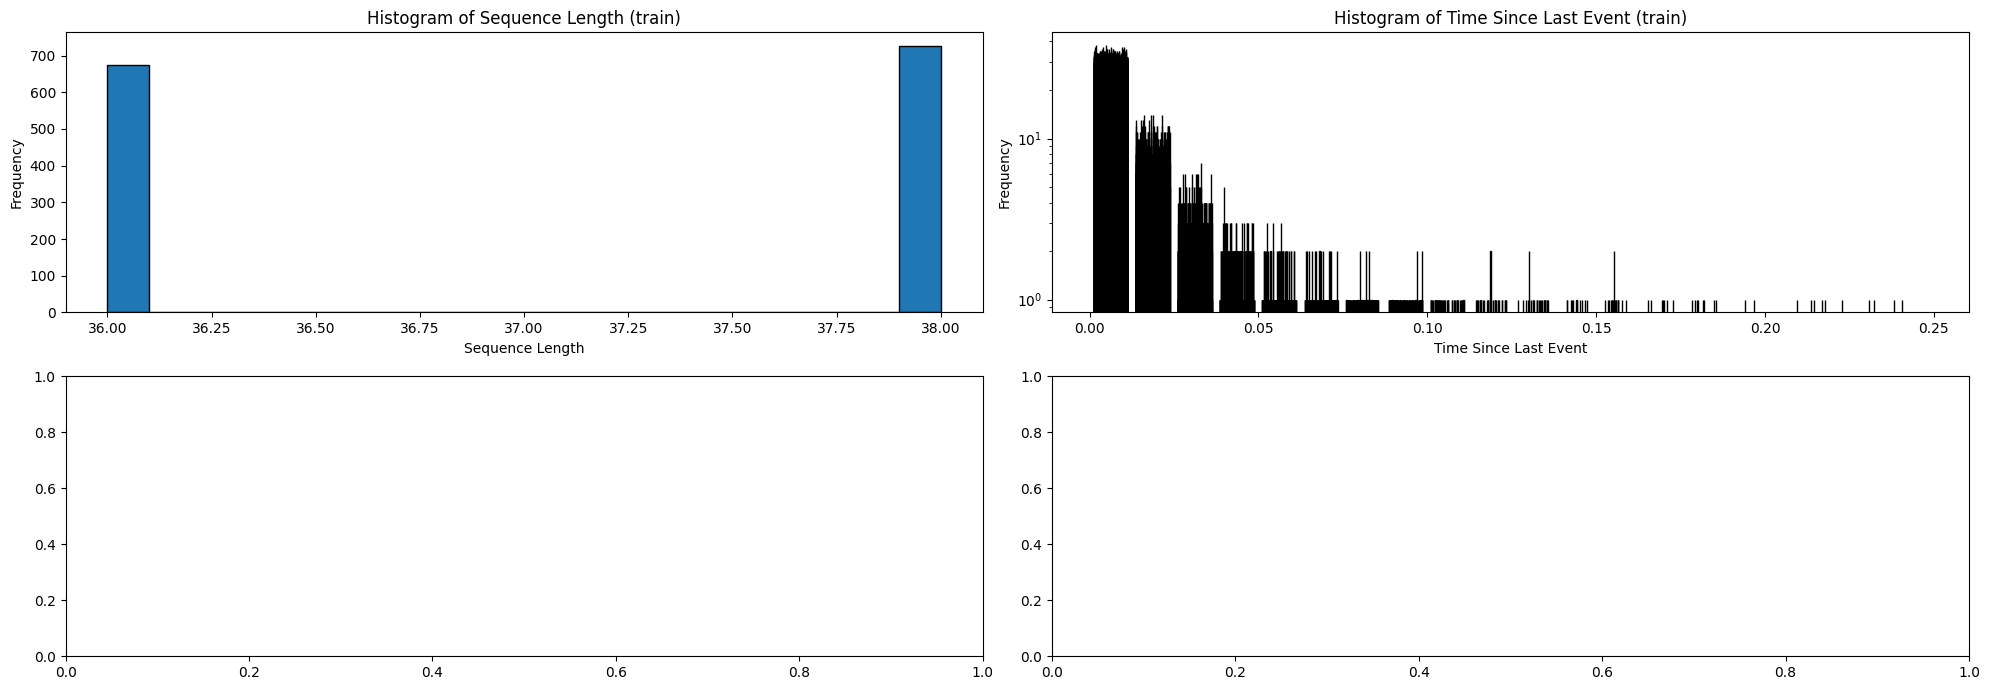

In [13]:
plot_stats(taxi_data)

In [14]:
# plot_stats_per_event_type(taxi_data, splits=['test'])

## Retweet

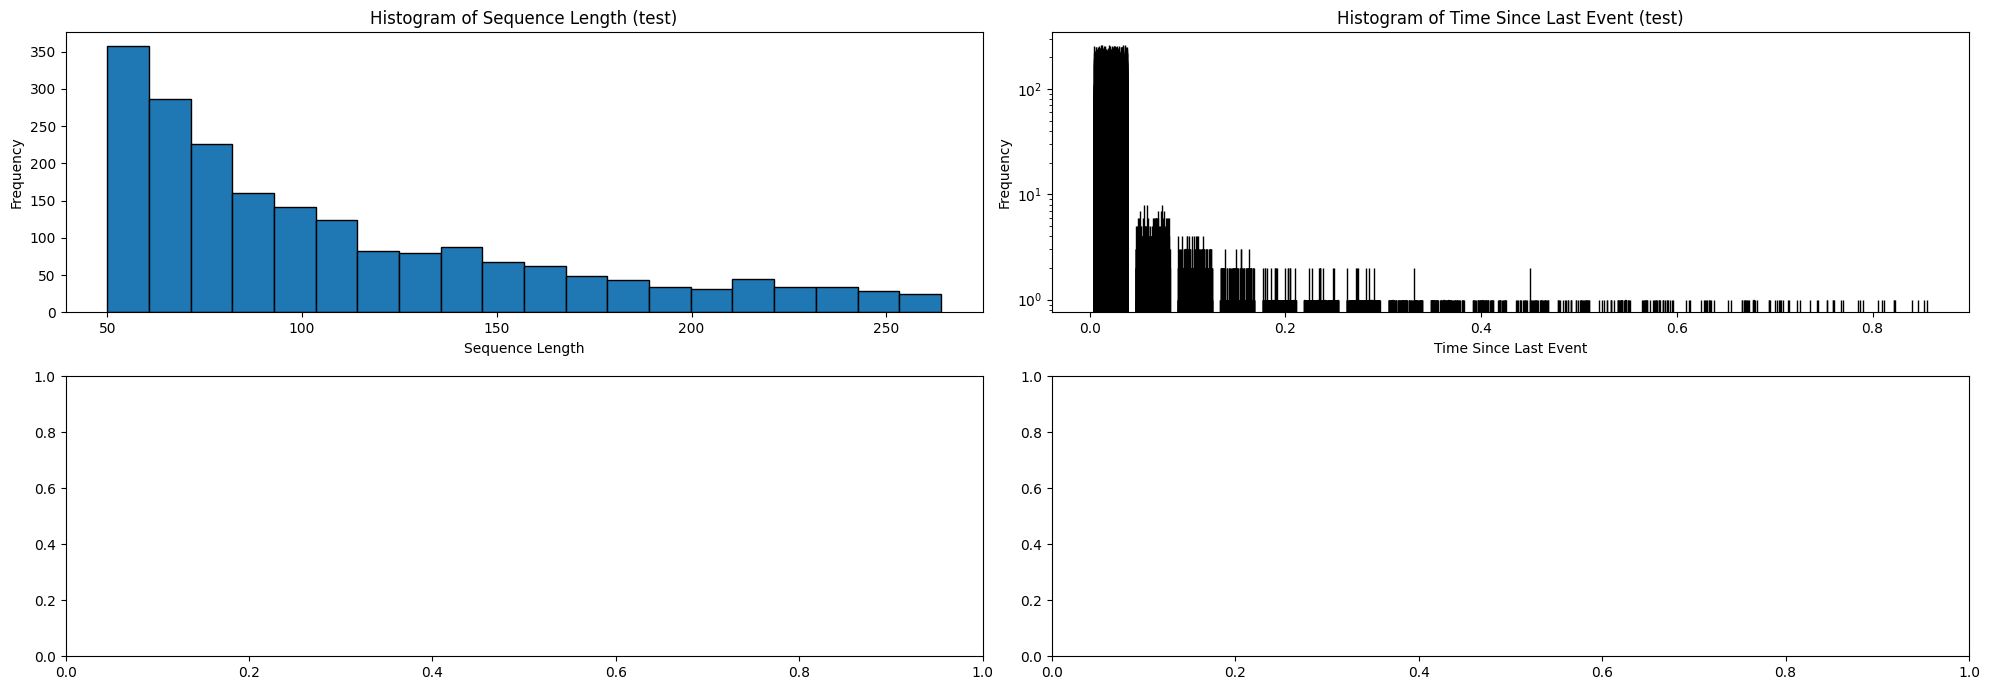

In [15]:
plot_stats(retweet_data, splits=["test"])

In [16]:
# plot_stats_per_event_type(retweet_data, splits=['test'])

## Amazon

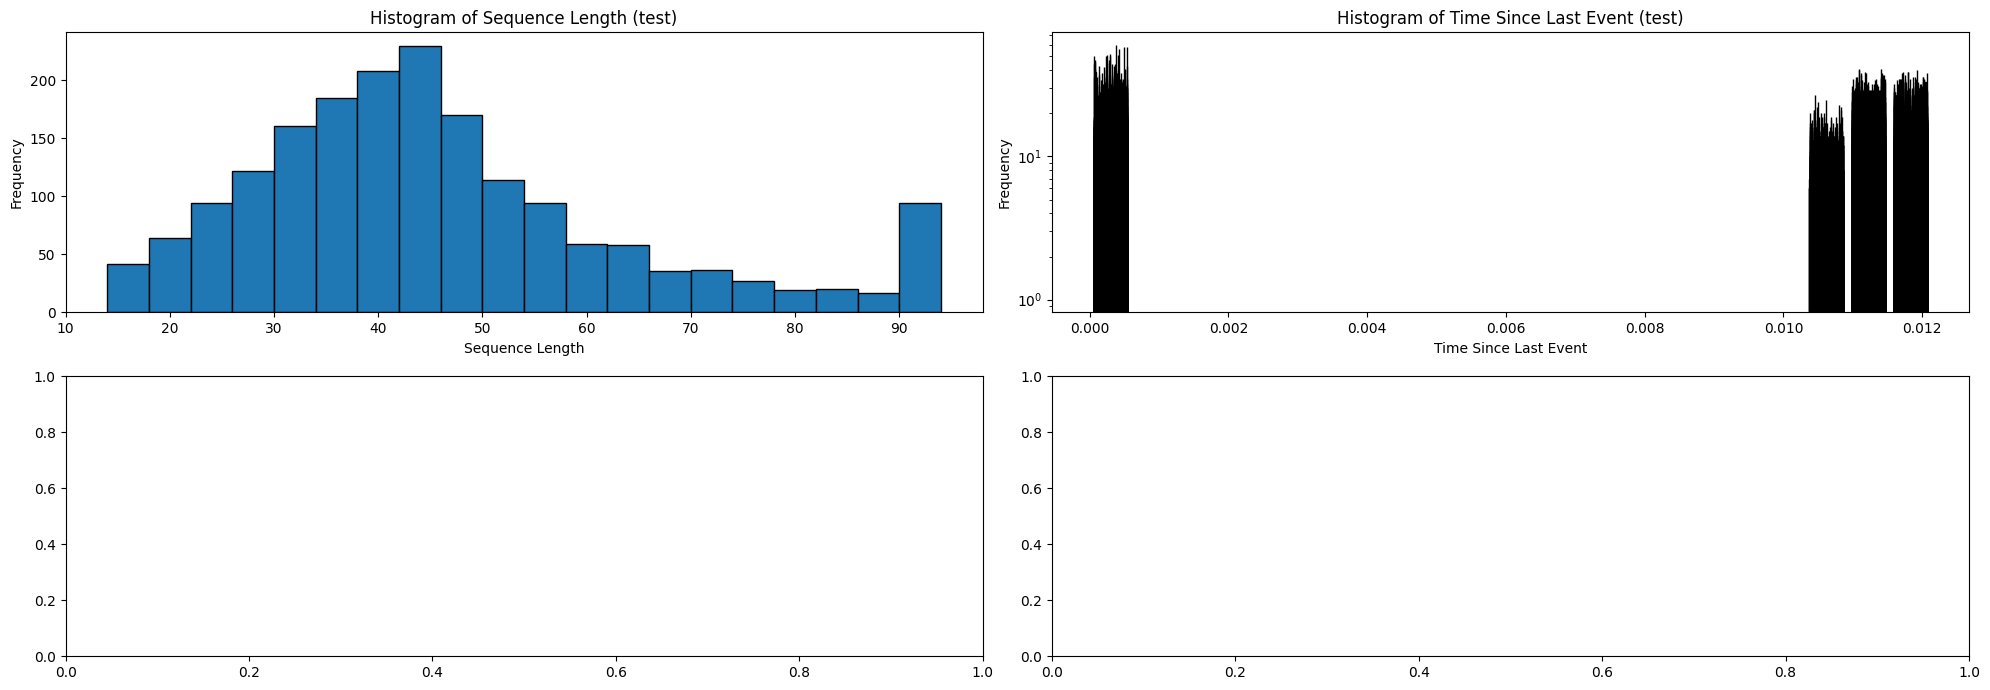

In [17]:
plot_stats(amazon_data, splits=["test"])

In [18]:
# plot_stats_per_event_type(amazon_data, splits=['test'])

## Taobao

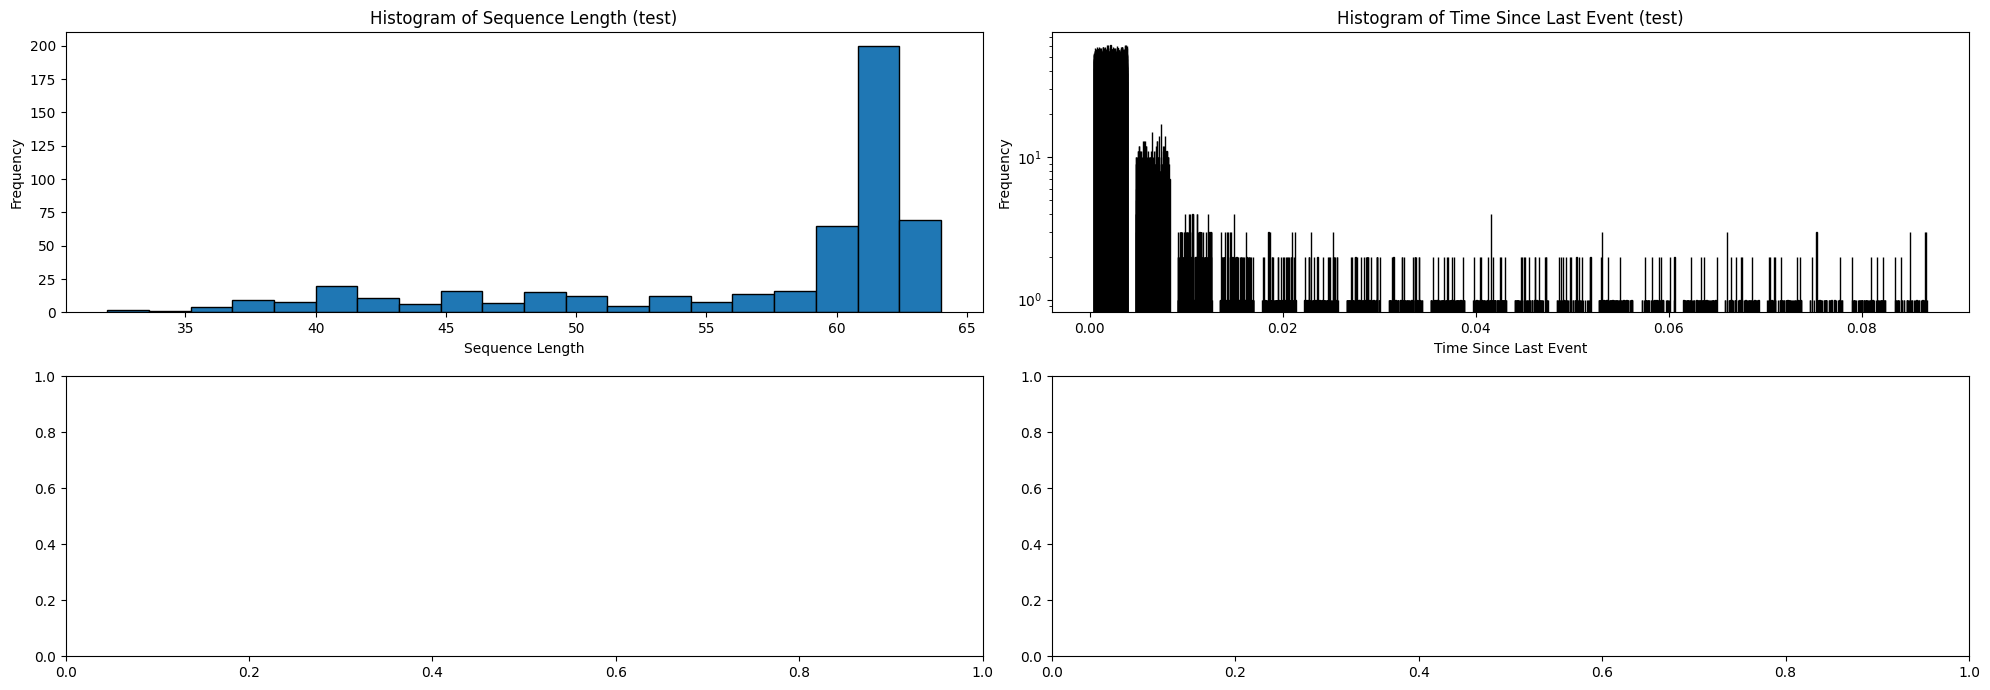

In [19]:
plot_stats(taobao_data, splits=["test"])

In [20]:
# plot_stats_per_event_type(taobao_data, splits=['test'])

## Stackoverflow

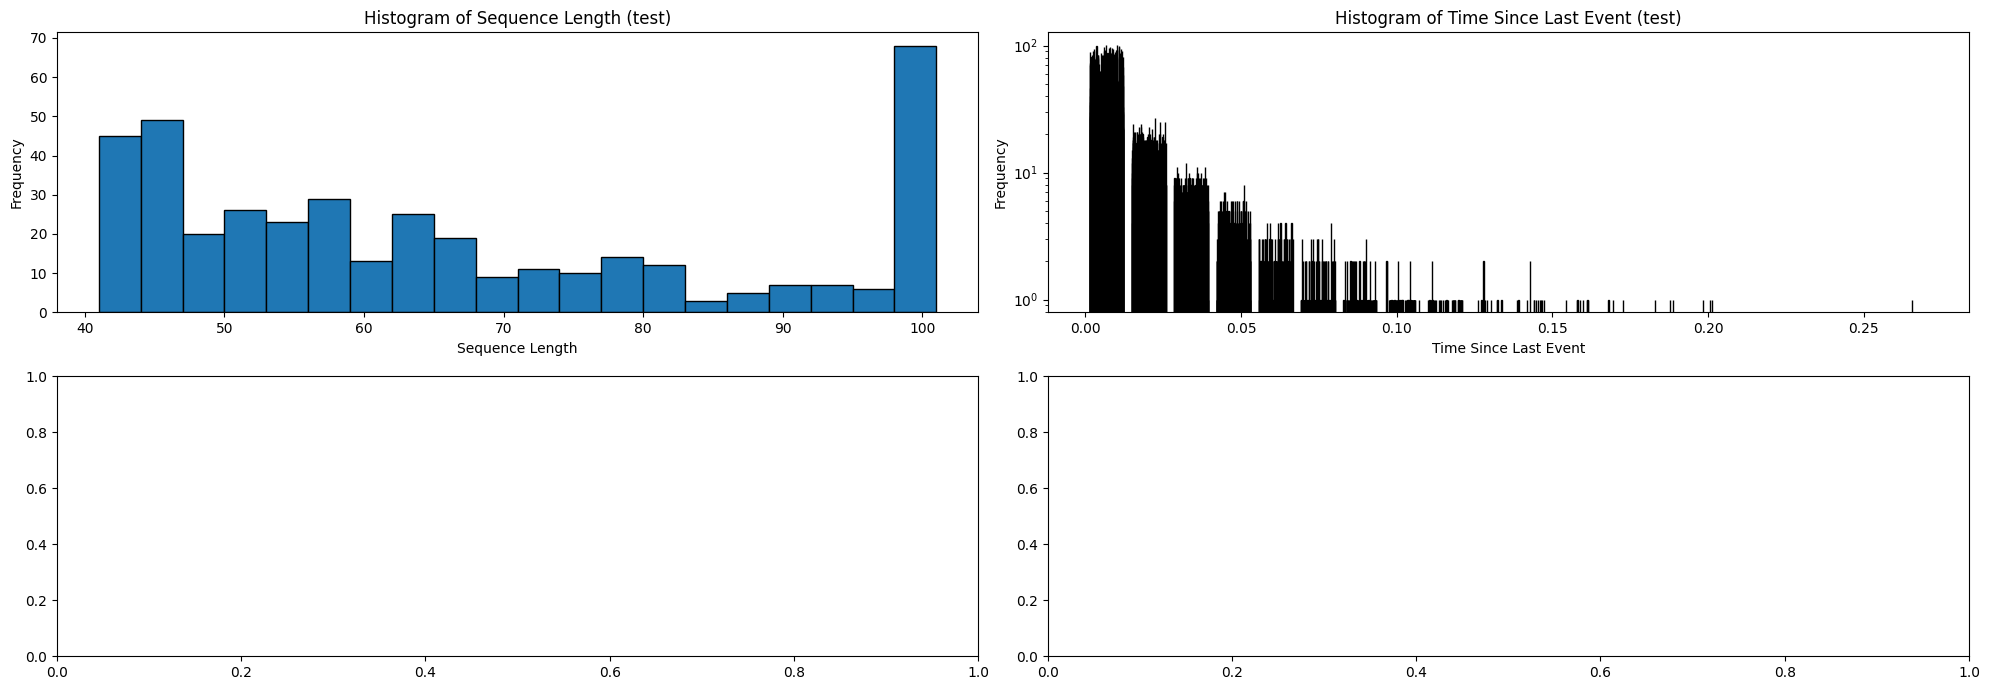

In [21]:
plot_stats(stackoverflow_data, splits=["test"])

In [22]:
# plot_stats_per_event_type(stackoverflow_data, splits=['test'])